**기본 세팅**

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

---

# 12. 다중 분류

이번 챕터에서는 iris 데이터를 이용해서 다중 분류를 진행해본다.

## 12.1 데이터 불러오기

먼저 사용할 데이터의 구조는 다음과 같다.

- sepal_length: 꽃받침 길이


- sepal_width: 꽃받침 너비


- petal_length: 꽃잎 길이


- petal_width: 꽃잎 너비


- species: 붓꽃 품종 (타겟)

In [3]:
# 데이터 불러오기
df = pd.read_csv("deeplearning/dataset/iris.csv",
                names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

- 총 150개의 샘플로 4개의 피처, 타겟으로 구성되어 있다.


- 타겟은 species로 setosa, versicolor, virginica로 3가지 종류를 가지고 있다.

## 12.2 데이터 시각화

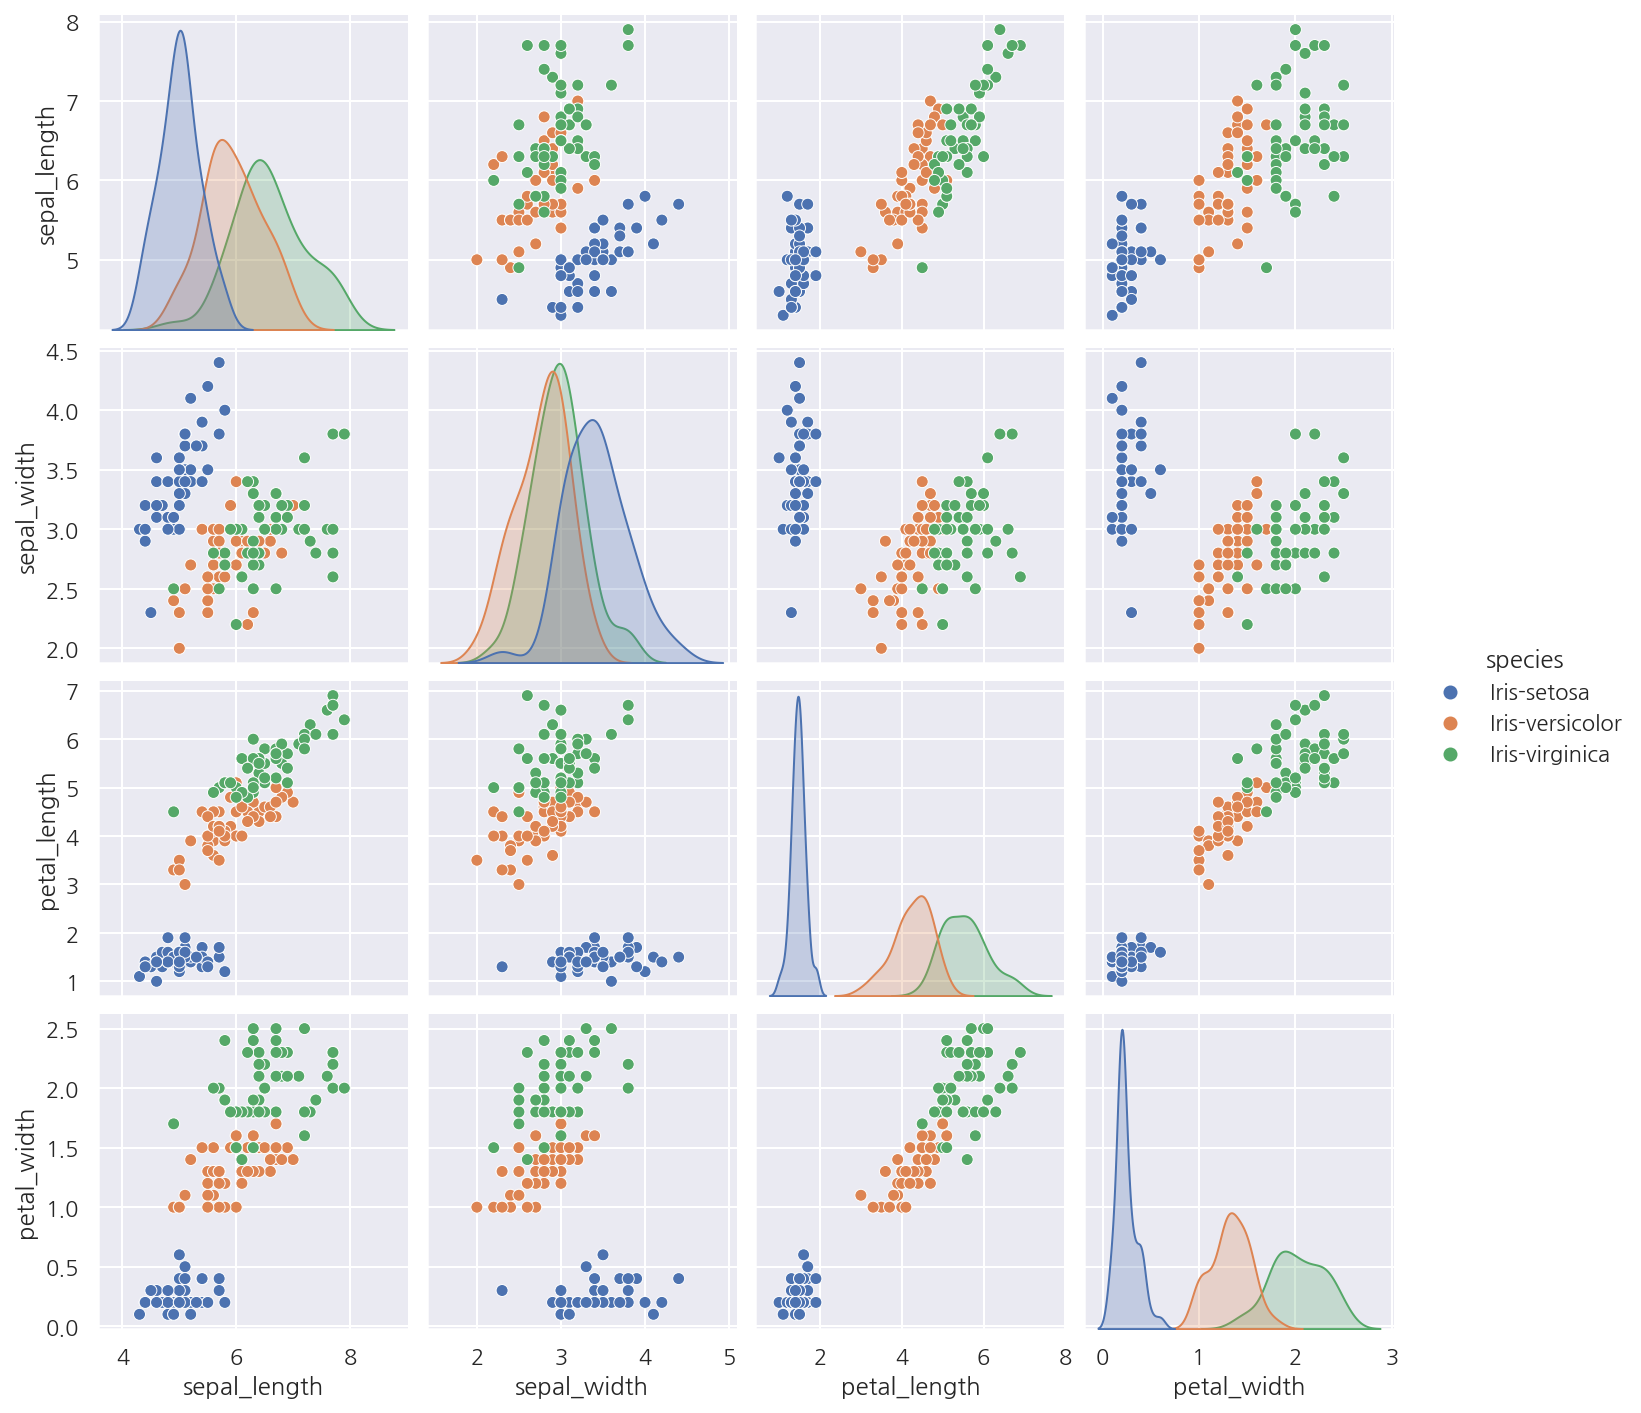

In [6]:
sns.pairplot(df, hue="species")

plt.show()

## 12.3 원-핫 인코딩

In [7]:
# 데이터 분리
dataset = df.values
X = dataset[:,:4].astype(float)
Y_obj = dataset[:,4]

- `values` 속성을 이용해서 데이터를 Numpy 배열 형태로 분리하였다.

In [8]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y_obj)
Y = encoder.transform(Y_obj)

Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

- 문자열로 된 타겟을 레이블 인코딩으로 숫자형으로 바꿔주었다.

In [9]:
import tensorflow as tf

# tensorflow의 원-핫 인코딩
Y_encoded = tf.keras.utils.to_categorical(Y)
Y_encoded[:5,:]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

- `tf.keras.utils.to_categorical()`을 이용해서 원-핫 인코딩을 실행 가능하다.

## 12.4 모델 설정

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 설정
model = Sequential()
model.add(Dense(16, input_dim=4, activation="relu"))
model.add(Dense(3, activation="softmax"))

- 이번엔 출력층에서 적용할 활성화 함수를 softmax를 사용하였다.

## 12.5 softmax

softmax는 다음 그림과 같이 항상 총합이 1인 형태로 바꿔주며 수식은 다음과 같은 형태이다.

$$p_{i} = \dfrac{e^{x_{i}}}{\sum_{i} e^{x_{i}}}$$

총합이 항상 1이기에 확률의 개념으로 생각하여 가장 높은 확률인 경우를 1, 나머지는 0으로 변환하는 것이다.

![](https://thebook.io/img/080228/155.jpg)

출처: <https://thebook.io/080228/part04/ch12/04/>

## 12.6 예측

In [11]:
# 시드 설정
np.random.seed(3)
tf.random.set_seed(3)

# 데이터 분리
dataset = df.values
X = dataset[:,:4].astype(float)
Y_obj = dataset[:,4]

# 레이블 인코딩
encoder = LabelEncoder()
encoder.fit(Y_obj)
Y = encoder.transform(Y_obj)

# tensorflow의 원-핫 인코딩
Y_encoded = tf.keras.utils.to_categorical(Y)

# 모델 설정
model = Sequential()
model.add(Dense(16, input_dim=4, activation="relu"))
model.add(Dense(3, activation="softmax"))

# 모델 컴파일
model.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

# 모델 실행
model.fit(X, Y_encoded, epochs=50, batch_size=1)

# 결과 출력
print("-"*100)
print(f"Accuracy: {model.evaluate(X, Y_encoded, verbose=0)[1]: .4f}")

Train on 150 samples
Epoch 1/50
150/150 [==============================] - 1s 4ms/sample - loss: 1.3262 - accuracy: 0.3333
Epoch 2/50
150/150 [==============================] - 0s 780us/sample - loss: 0.8467 - accuracy: 0.5933
Epoch 3/50
150/150 [==============================] - 0s 791us/sample - loss: 0.7125 - accuracy: 0.6800
Epoch 4/50
150/150 [==============================] - 0s 799us/sample - loss: 0.6236 - accuracy: 0.7867
Epoch 5/50
150/150 [==============================] - 0s 817us/sample - loss: 0.5535 - accuracy: 0.8533
Epoch 6/50
150/150 [==============================] - 0s 783us/sample - loss: 0.4985 - accuracy: 0.8667
Epoch 7/50
150/150 [==============================] - 0s 783us/sample - loss: 0.4583 - accuracy: 0.9133
Epoch 8/50
150/150 [==============================] - 0s 839us/sample - loss: 0.4272 - accuracy: 0.9400
Epoch 9/50
150/150 [==============================] - 0s 800us/sample - loss: 0.4006 - accuracy: 0.9200
Epoch 10/50
150/150 [========================

- 타겟이 다중 분류이므로 오차 함수는 categorical_crossentropy를 사용하였다.


- 같은 이유로 활성화 함수를 softmax를 사용하였다.


- 예측 정확도는 약 97.33%로 나타났다.